<a href="https://colab.research.google.com/github/sandeepss2020/Machine-Learning/blob/main/ML_lab_6_ML_Decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

X and Y Value
    JobFamilyDescription  JobClassDescription  EducationLevel  Experience  \
0                      0                    0               3           1   
1                      0                    1               4           1   
2                      0                    2               4           2   
3                      0                    3               5           5   
4                      1                    4               1           0   
..                   ...                  ...             ...         ...   
61                    14                   61               1           1   
62                    14                   62               4           1   
63                    14                   63               5           2   
64                    14                   64               5           5   
65                    14                   65               5           5   

    OrgImpact  ProblemSolving  Supervision  ContactLevel  Fin

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


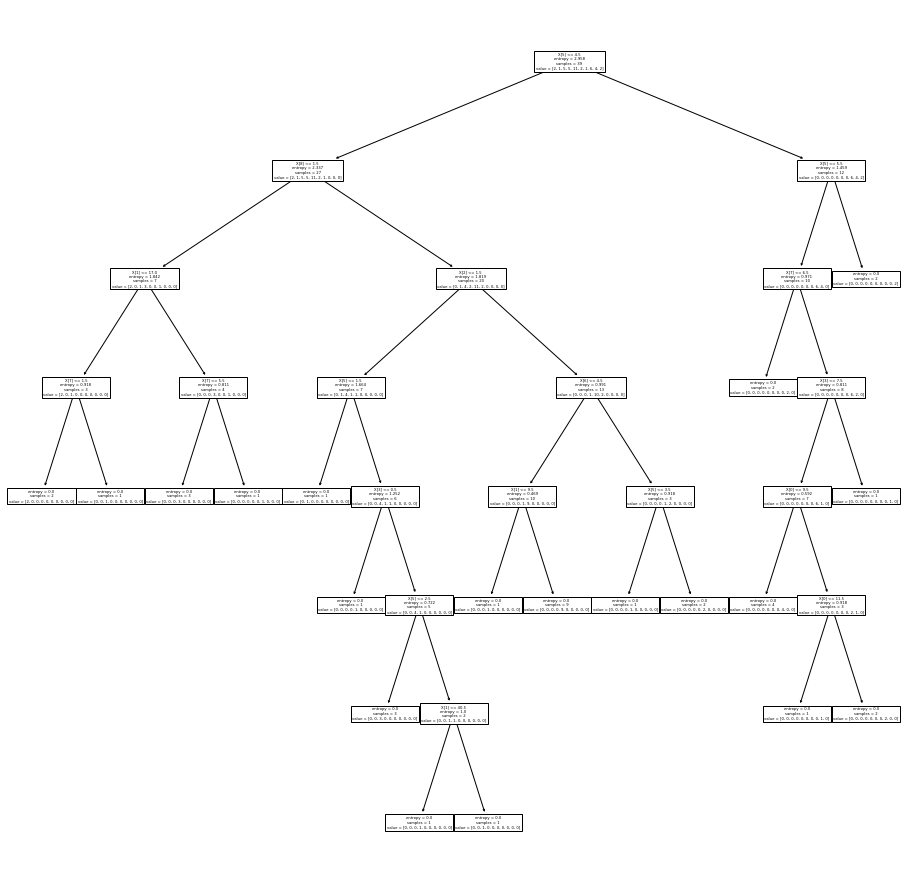

In [ ]:
dataset= pd.read_csv('jobclassinfo2.csv')

Le = LabelEncoder()


dataset['JobFamilyDescription'] = Le.fit_transform(dataset['JobFamilyDescription'])
dataset['JobClassDescription'] = Le.fit_transform(dataset['JobClassDescription'])



# print(dataset)

y = dataset['PayGrade']
X = dataset.drop(['JobClass','PayGrade','PG' ,'ID','JobFamily'],axis=1)
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.4)

print("X and Y Value")
print(X, y)

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)
predictions= dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
tree.plot_tree(dtree)
plt.rcParams['figure.figsize'] = [16,16]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
ac = accuracy_score(y_test,predictions)
print(ac)

0.4074074074074074


NEW APPROACH


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
def importdata():
    balance_data = pd.read_csv('jobclassinfo2.csv')
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
    print ("Dataset: ",balance_data.head())
    return balance_data

In [ ]:
def splitdataset(balance_data):
    Le = LabelEncoder()
    balance_data['JobFamilyDescription'] = Le.fit_transform(balance_data['JobFamilyDescription'])
    balance_data['JobClassDescription'] = Le.fit_transform(balance_data['JobClassDescription'])
    # Separating the target variable
    X = balance_data.drop(['JobClass','PayGrade','PG' ,'ID','JobFamily'],axis=1)
    Y = balance_data['PayGrade']
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test

In [ ]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [ ]:
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [ ]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [ ]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : \n",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : \n",
    classification_report(y_test, y_pred))

In [ ]:
def main():
      
    # Building Phase
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      

In [ ]:
# Calling main function
if __name__=="__main__":
    main()

Dataset Length:  66
Dataset Shape:  (66, 14)
Dataset:     ID  JobClass  JobFamily    JobFamilyDescription JobClassDescription  \
0   1         1          1  Accounting And Finance        Accountant I   
1   2         2          1  Accounting And Finance       Accountant II   
2   3         3          1  Accounting And Finance      Accountant III   
3   4         4          1  Accounting And Finance       Accountant IV   
4   5         5          2  Administrative Support     Admin Support I   

   EducationLevel  Experience  OrgImpact  ProblemSolving  Supervision  \
0               3           1          3               3            4   
1               4           1          5               4            5   
2               4           2          6               5            6   
3               5           5          6               6            7   
4               1           0          1               1            1   

   ContactLevel  FinancialBudget    PG  PayGrade  
0         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat